In [1]:
from HopfieldNet import ClassicHopfield, DiscreteHopfield, ContinuousHopfield

In [2]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
IMG_SHAPE = (128, 128)
DISCRETE_IMG_DIR = "imgs/discrete"
CONTINUOUS_IMG_DIR = "imgs/cartoon"

In [4]:
def load_images(d: str, shape=(64, 64), binary: bool=True) -> np.ndarray:
    images = []
    for filename in os.listdir(d):
        img = Image.open(os.path.join(d, filename)).convert("L")
        img = img.resize(shape)  # Resize to shape
        img_array = np.array(img).flatten()
        images.append(img_array)

    images = np.array(images, dtype=np.float32)  # Convert to numpy array
    images = (images - 127.5) / 127.5
    if binary:
        images = np.where(images > 0, 1, -1)  # Convert to binary (-1, 1)
    return images
     

In [5]:
def save_images(images, folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    for i, img in enumerate(images):
        img = img.reshape(IMG_SHAPE)
        img = (img + 1) / 2 * 255
        img = Image.fromarray(img.astype(np.uint8))
        img.save(os.path.join(folder_path, f"{i + 1}.png"))

In [6]:
def plot_images(images, n_cols=6, shape=(64, 64)):
    n_rows = int(np.ceil(len(images) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
    # Ensure axes is always iterable, even if it's a single Axes object
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    for i, ax in enumerate(axes.ravel()): # Use ravel to handle multi-dimensional arrays of axes
        if i < len(images):
            ax.imshow(images[i].reshape(shape), cmap='gray')
            ax.axis('off')
        else:
            ax.axis('off')  # Hide unused subplots
    plt.tight_layout()
    plt.show()

In [7]:
def noise_image(image, noise_factor=0.5):
    noise = np.random.normal(loc=0.0, scale=noise_factor, size=image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, -1.0, 1.0)  # Ensure values are in [-1, 1]
    return noisy_image.copy()

def set_element_random(image, fraction=0.5):
    # set from portion of the image to random from the first element
    num_elements = image.size
    num_to_set = int(num_elements * fraction)
    random_values = np.random.choice(image, num_to_set, replace=False)
    image[:num_to_set] = random_values
    return image.copy()

def grayen_half_image(image):
    half = image.shape[0] // 2
    image[half:] = 0
    return image.copy()

def grayen_vertically_image(image):
    image.reshape(IMG_SHAPE)
    half = image.shape[1] // 2
    image[:, half:] = 0
    image = image.flatten()
    return image.copy()

def blacken_half_image(image):
    half = image.shape[0] // 2
    image[half:] = -1
    return image.copy()

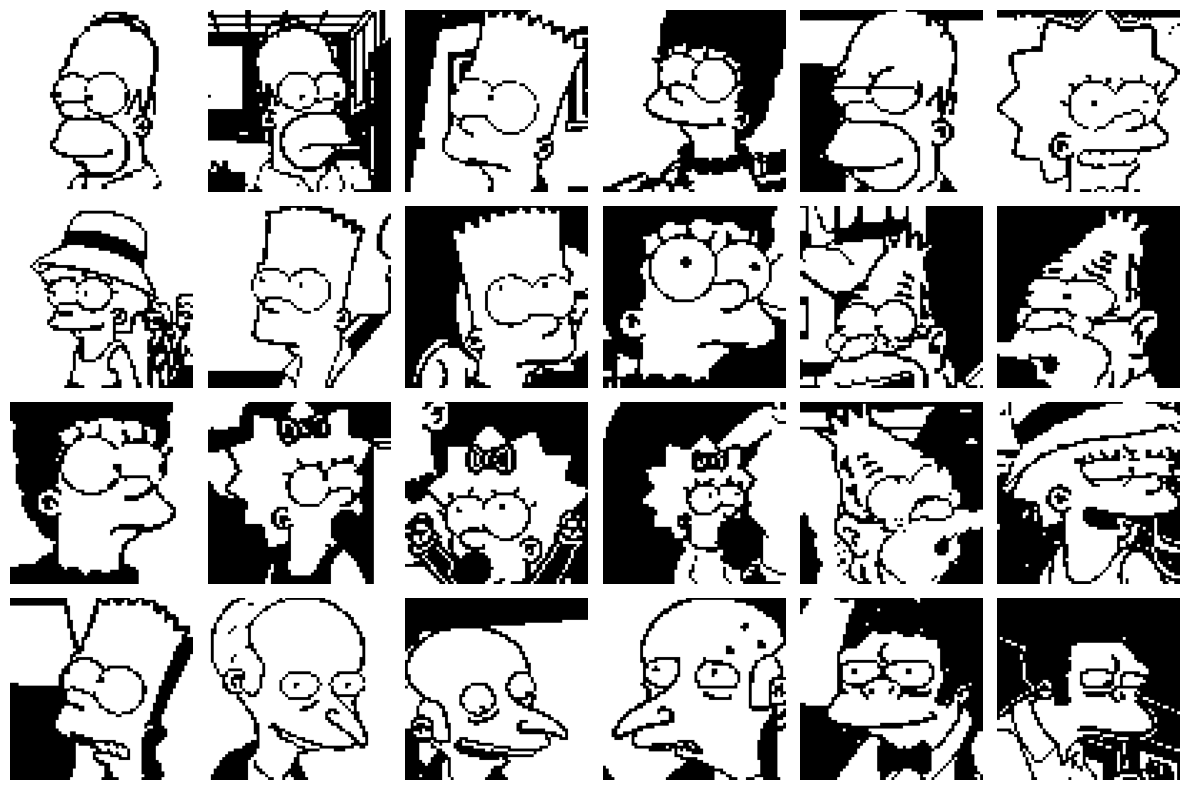

In [8]:
images = load_images(DISCRETE_IMG_DIR, shape=IMG_SHAPE, binary=True)
plot_images(images, n_cols=6, shape=IMG_SHAPE)

In [9]:
hopefield_network = ClassicHopfield()
hopefield_network.store_patterns(images)

modern_hopefield_network = DiscreteHopfield()
modern_hopefield_network.store_patterns(images)

Modified image (half blackened):


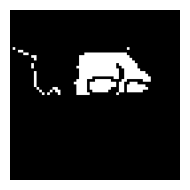

In [10]:
modified_images = blacken_half_image(images[23].copy())
print("Modified image (half blackened):")
plot_images([modified_images.reshape(IMG_SHAPE)], n_cols=1, shape=IMG_SHAPE)

Iteration #1: Energy=-483246800.0000 (Delta E = -169297712.0000), State=[-1 -1 -1 ... -1 -1 -1]
Iteration #2: Energy=-486857904.0000 (Delta E = -3611104.0000), State=[-1 -1 -1 ... -1 -1 -1]
Iteration #3: Energy=-487542048.0000 (Delta E = -684144.0000), State=[-1 -1 -1 ... -1 -1 -1]
Iteration #4: Energy=-487573632.0000 (Delta E = -31584.0000), State=[-1 -1 -1 ... -1 -1 -1]
Iteration #5: Energy=-487576992.0000 (Delta E = -3360.0000), State=[-1 -1 -1 ... -1 -1 -1]
Iteration #6: Energy=-487576992.0000 (Delta E = 0.0000), State=[-1 -1 -1 ... -1 -1 -1]
Recovered image:


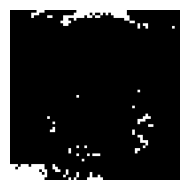

In [11]:
recovered_image = hopefield_network.retrieve(modified_images.copy(), mode="async", max_iter=1000)

print("Recovered image:")
plot_images([recovered_image.reshape(IMG_SHAPE)], n_cols=1, shape=IMG_SHAPE)

Recovered image:


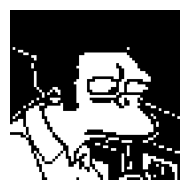

In [12]:
retrieved_image = modern_hopefield_network.retrieve(modified_images.copy())

print("Recovered image:")
plot_images([retrieved_image.reshape(IMG_SHAPE)], n_cols=1, shape=IMG_SHAPE)

In [13]:
images = load_images(CONTINUOUS_IMG_DIR, shape=IMG_SHAPE, binary=False)

In [14]:
continuous_hopefield_network = ContinuousHopfield(beta=128)
continuous_hopefield_network.store_patterns(images)

# plot_images(continuous_hopefield_network.patterns, n_cols=5, shape=IMG_SHAPE)

In [ ]:
rd_idx = np.random.randint(0, len(images))

modified_images = noise_image(images[rd_idx].copy())
print("Modified image (half grayened):")
plot_images([modified_images.reshape(IMG_SHAPE)], n_cols=1, shape=IMG_SHAPE)

print("modified_images", modified_images)

IndexError: tuple index out of range

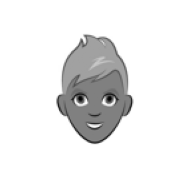

In [ ]:
plot_images([images[rd_idx]], n_cols=1, shape=IMG_SHAPE)

Recovered image:


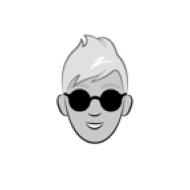

In [ ]:
retrieved_image = continuous_hopefield_network.retrieve(modified_images.copy())
print("Recovered image:")
plot_images([retrieved_image.reshape(IMG_SHAPE)] , n_cols=1, shape=IMG_SHAPE)

In [ ]:
print(continuous_hopefield_network.energy(modified_images.copy()))
print(continuous_hopefield_network.energy(retrieved_image.copy()))

4057.3570080041454
261.16267639925445
